# **Assignment 10: Introduction to Convolutional Auto-Encoders**

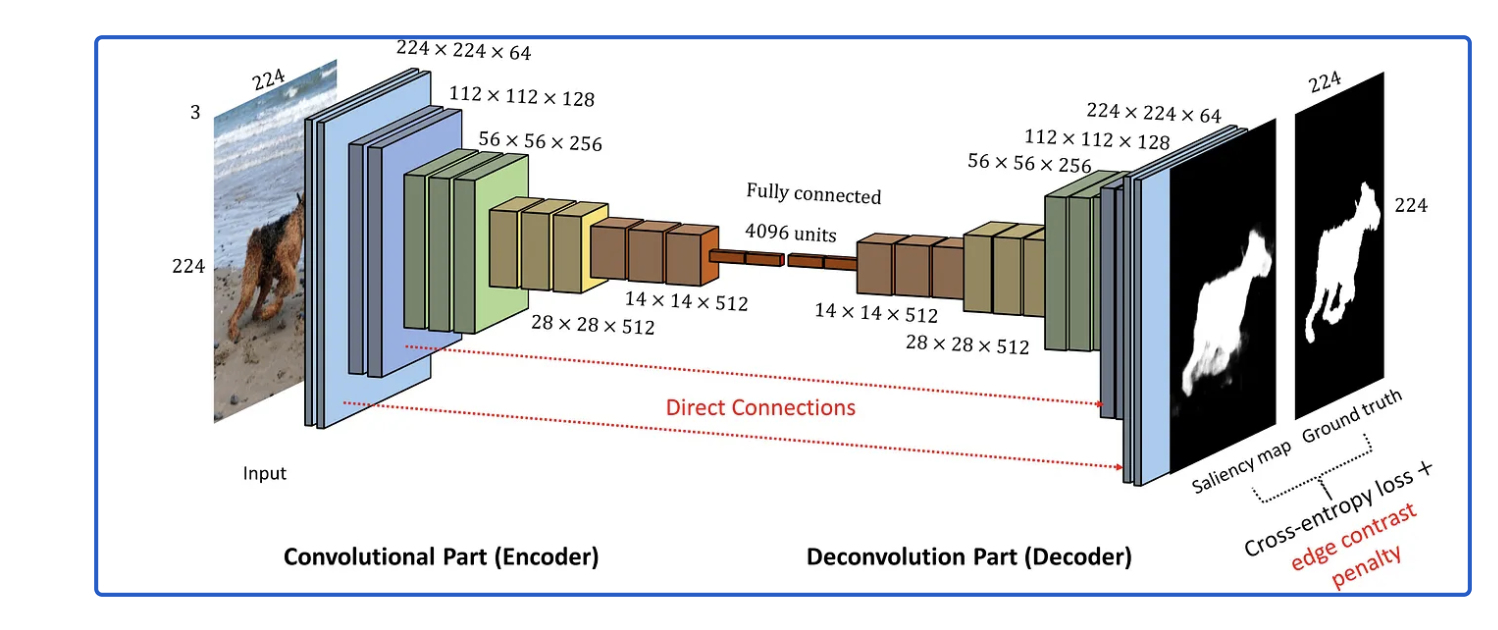

# **Dataset**

CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

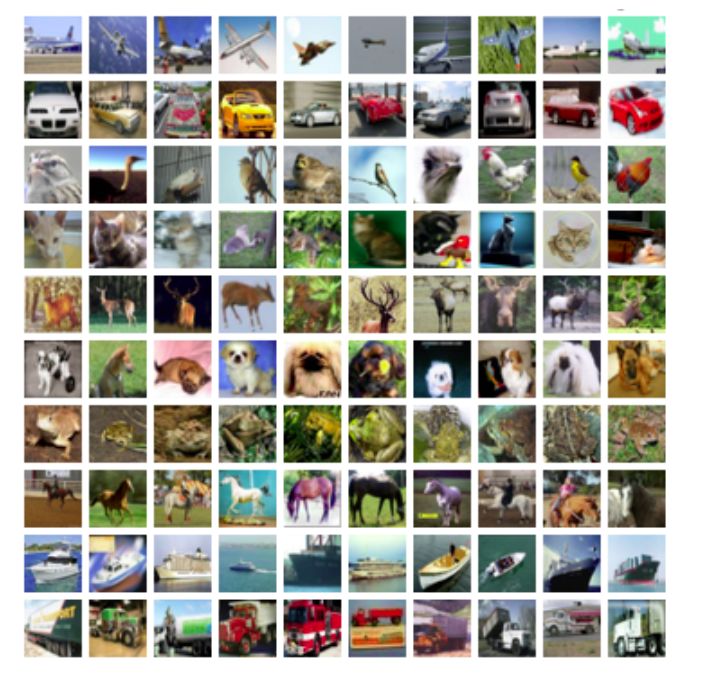

# **Question 1_AutoEncoder**

Load the data, What is the shape of the training and test sets in CIFAR-10? Show the Python code you used to normalize the dataset. Can you analyze your approach? What do you think it would happen if we train an autoencoder without normalization? Is there any other technique needed to perform pre-processing step?

In [3]:
# Import required libraries
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Show original shapes
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

# Convert to float and normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Check new range after normalization
print("After normalization:")
print("x_train range:", x_train.min(), "to", x_train.max())
print("x_test range:", x_test.min(), "to", x_test.max())

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
After normalization:
x_train range: 0.0 to 1.0
x_test range: 0.0 to 1.0


The code loads the CIFAR-10 dataset, which has 60,000 color images (32×32×3).
It shows the training and test shapes, then converts pixel values from 0–255 to 0–1.
This normalization makes the data easier for the model to process and helps training become faster and more stable.

The normalization step keeps all pixel values in the same range, preventing large gradients and unstable learning.
Without it, the autoencoder would train slower and might fail to learn fine image details.
This method is simple and effective, though we could also subtract the mean or use data augmentation to improve model performance later.

# **Question 2_AutoEncoder**

Using EDA, show at least one sample image from each class. And, provide image size, color channels, and visual complexity.

Plot a grid of 25 random images, what differences do you notice across categories (e.g., background complexity, color distributions)? explain it.

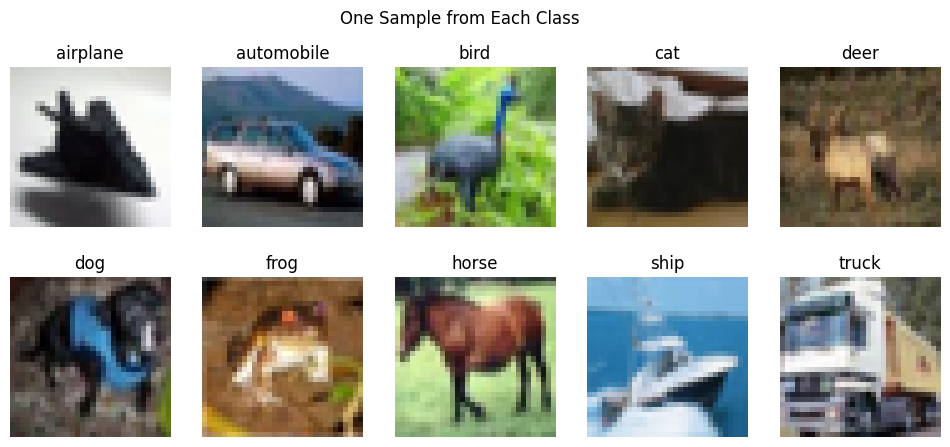

Image size: (32, 32)
Color channels: 3


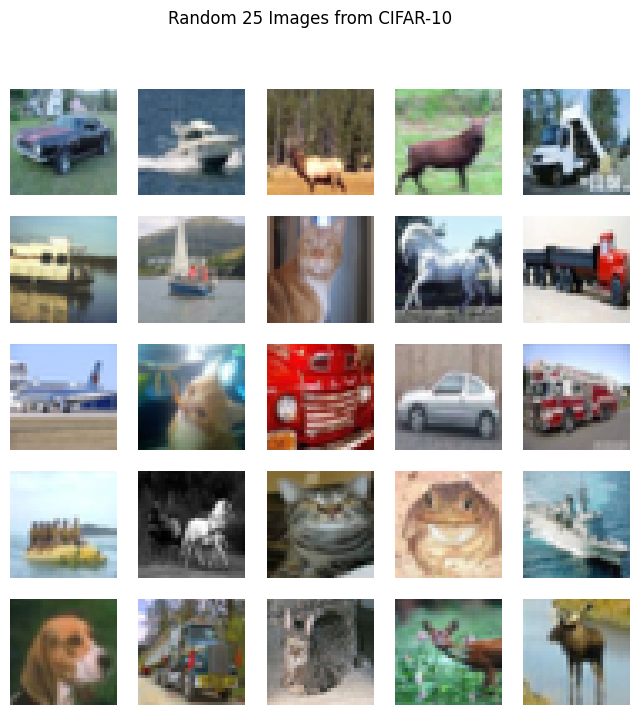

In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define class names
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Show one image per class
plt.figure(figsize=(12, 5))
for i in range(10):
    idx = (y_train == i).flatten().nonzero()[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx])
    plt.title(class_names[i])
    plt.axis('off')
plt.suptitle("One Sample from Each Class")
plt.show()

# Print image properties
print("Image size:", x_train.shape[1:3])
print("Color channels:", x_train.shape[3])

# Plot a 5x5 grid of random images
plt.figure(figsize=(8, 8))
for i in range(25):
    idx = np.random.randint(0, len(x_train))
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[idx])
    plt.axis('off')
plt.suptitle("Random 25 Images from CIFAR-10")
plt.show()

We used EDA to understand CIFAR-10. Each image is 32×32 pixels with 3 RGB channels. We showed one sample per class and 25 random images to see variation among categories.

Images show strong diversity in background and colors. Animals often appear in natural scenes with complex textures, while vehicles have simpler or uniform backgrounds. Color ranges differ by class, some bright, some darker which shows CIFAR-10’s complexity and the need for normalization and robust feature extraction in later steps.

# **Question 3_AutoEncoder**
Using Keras/PyTorch, build a Convolutional Autoencoder architecture:

*   **Encoder:** Use convolutional and pooling layers to compress the input image into a latent space representation.
*   **Decoder:**  Use upsampling and convolutional layers to reconstruct the original image from the latent representation.

Ensure symmetry between encoder and decoder.


*   Train the model using reconstruction loss (e.g., Mean Squared Error or Binary Cross-Entropy) for at least 20 epochs.
*   Use appropriate optimizers (e.g., Adam).

Discuss about the architecture of your proposed model.

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

# Load normalized CIFAR-10 data
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Encoder
encoder = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
])

# Decoder
decoder = models.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same'),
])

# Combine encoder + decoder
autoencoder = models.Sequential([encoder, decoder])

# Compile model
autoencoder.compile(optimizer='adam', loss='mse')

# Train model (20 epochs, validation on test set)
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/20
391/391 [==============================] - 17s 43ms/step - loss: 0.0168 - val_loss: 0.0105
Epoch 2/20
391/391 [==============================] - 17s 43ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 3/20
391/391 [==============================] - 17s 43ms/step - loss: 0.0080 - val_loss: 0.0072
Epoch 4/20
391/391 [==============================] - 17s 43ms/step - loss: 0.0070 - val_loss: 0.0064
Epoch 5/20
391/391 [==============================] - 17s 43ms/step - loss: 0.0064 - val_loss: 0.0060
Epoch 6/20
391/391 [==============================] - 17s 42ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 7/20
391/391 [==============================] - 17s 43ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 8/20
391/391 [==============================] - 17s 43ms/step - loss: 0.0055 - val_loss: 0.0051
Epoch 9/20
391/391 [==============================] - 17s 42ms/step - loss: 0.0052 - val_loss: 0.0051
Epoch 10/20
391/391 [==============================] - 17s 42ms/step - loss: 0.005

We built a symmetric convolutional autoencoder with three encoding and three decoding layers. Each encoder block (Conv + Pool) compresses image features, each decoder block (Upsample + Conv) restores resolution. The model was trained for 20 epochs with MSE loss and Adam optimizer.


Training loss dropped from 0.0168 to 0.0041, showing effective reconstruction learning. Validation loss followed a similar trend, meaning no overfitting. This architecture captures essential visual patterns while maintaining smooth reconstruction. However, fine details remain slightly blurred that future work can add skip connections (U-Net) or use perceptual loss for sharper results.

# **Question 4_AutoEncoder**



*   Reconstruct images from the test set and compare them visually to the originals.
*   Provide qualitative results (side-by-side image comparisons).

      *   **Note:** Compare the reconstructed images with the originals.


*   Provide quantitative results using reconstruction loss on the test set.

      *   Measure how close the reconstructed images are to the originals using a numerical error metric ( such as Mean Squared Error (MSE), Binary Cross-Entropy (BCE), or PSNR (Peak Signal-to-Noise Ratio)).

Analyze your results and discuss it in details.






313/313 [==============================] - 1s 4ms/step


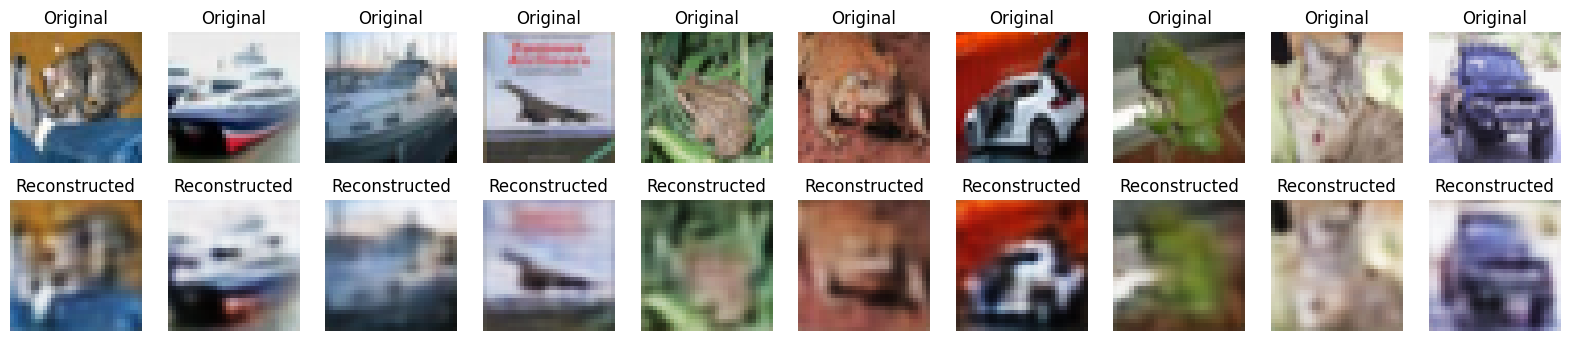

Test Reconstruction MSE: 0.00393
Average PSNR (first 1000 images): 24.60 dB


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 again (normalized)
(_, _), (x_test, _) = cifar10.load_data()
x_test = x_test.astype("float32") / 255.0

# Reconstruct images using the trained autoencoder
reconstructed = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i])
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()

# Mean Squared Error
mse = np.mean(np.square(x_test - reconstructed))

# PSNR
psnr_values = [psnr(x_test[i], reconstructed[i]) for i in range(1000)]
avg_psnr = np.mean(psnr_values)

print(f"Test Reconstruction MSE: {mse:.5f}")
print(f"Average PSNR (first 1000 images): {avg_psnr:.2f} dB")

We reconstructed CIFAR-10 test images using the trained autoencoder. The top row shows the original images and the bottom row shows the reconstructed ones. Visually, the autoencoder preserved the overall object shapes and dominant colors but blurred fine textures.

The reconstruction results show that the autoencoder successfully learns the main structure and color distribution of CIFAR-10 images while losing fine-grained details. With an MSE of 0.0039 and an average PSNR of 24.6 dB, the model achieves stable pixel-level reconstruction quality. Smooth and simple objects are reproduced clearly, but complex textures appear blurred due to information loss in the latent space. Overall, the model performs well for a basic convolutional autoencoder, though sharper reconstruction could be achieved with deeper layers or skip-connection designs.

# **Question 5_ AutoEncoder**

The corrsponding images in this assignment, CIFAR-10 images,  contain textures (e.g., fur, leaves, water); however, some datasets, such as  MNIST/Fashion-MNIST don’t. How does this impact the design of convolutional layers in your proposed Convolutional autoencoder?


Also, Color images may require more parameters and training time. Discuss how this could affect overfitting/underfitting in convolutional autoencoders.

And, how might the latent representations differ for color images versus grayscale?

For texture-rich datasets like CIFAR-10, convolutional autoencoders need deeper architectures with more filters to capture the variety of edges, patterns, and color gradients present in natural images. In contrast, datasets such as MNIST or Fashion-MNIST contain simpler grayscale patterns, where fewer convolutional layers and smaller kernels are sufficient because spatial and textural variations are limited.

Color images introduce three input channels (RGB) instead of one, increasing the number of learnable parameters in every convolutional layer. This raises both the computational cost and the risk of overfitting, especially if the model capacity grows faster than the dataset’s size. Conversely, if the network is too shallow, it may underfit, failing to capture complex inter-channel correlations like lighting and shading.

Latent representations of color images encode richer information, both spatial structure and chromatic relationships, while grayscale representations focus mainly on luminance and shape. Consequently, color-based latent spaces are typically higher-dimensional and contain more disentangled semantic features, whereas grayscale latent spaces remain more compact and less expressive.

### Final Reflection

Through this assignment, I learned how convolutional autoencoders can compress and reconstruct image data effectively. Building the model helped me understand the balance between encoder depth and decoder symmetry. I also realized that normalization and careful preprocessing greatly stabilize training. Visual inspection showed that the model captures global structure but struggles with texture details, this suggests potential improvements such as using skip connections (U-Net) or perceptual loss functions. Overall, this project deepened my understanding of unsupervised learning and representation learning in CNNs.